## Estudo Dirigido: Roubos e Furtos de veículos no estado de São Paulo em 2016/2017

#### Autor: Ramon de Carvalho Nogueira 
#### LinkedIn: https://www.linkedin.com/in/ramonrcn/
#### E-Mail: ramon_rcn@hotmail.com
#### Data de início: 14/02/2018
#### Dados públicos obtidos em http://www.ssp.sp.gov.br/transparenciassp/

### Este estudo tem como objetivos
    Exibir de forma objetiva e rápida os dados coletados pela SSP.
    Responder as seguintes questões:
        - Quais os veículos mais visados?
        - Quais os veículos menos visados?
        - Total de ocorrências para cada modelo.
        - Total de ocorrências por localidade.
        - Cidades com o maior número de ocorrências.
        - Quais as regiões com maior índice de ocorrências?
        
### Além de satifazer algumas curiosidades pessoais
    - Existe uma cor 'preferida' pelos bandidos na hora de levar seu carro?
    Entre outras que irão surgindo durante o processo e que serão destacadas durante o Notebook.
    
### Será dividido em partes
    Afim de facilitar o entendimento, o estudo será dividido em partes:
        Tratamento dos dados de Furtos de 2016
        Tratamento dos dados de Roubos de 2016
        Tratamento dos dados de Furtos de 2017
        Tratamento dos dados de Roubos de 2017
        [Estamos aqui] - Geração de Valor a partir dos dados tratados para roubos e furtos no período 2016/2017
           

In [1]:
#import das bibliotecas

import pandas as pd
import matplotlib as mtp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importando Dados tratados de 2016
path = r'C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\3 - Dados Consolidados\Furtos2016_v1.csv'
furtos2016 = pd.read_csv(path, engine='python', sep = ',', parse_dates=['BO_INICIADO', 'BO_EMITIDO', 'DATAOCORRENCIA', 'DATACOMUNICACAO'])
furtos2016.drop('Unnamed: 0', axis = 1, inplace = True)

path = r'C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\3 - Dados Consolidados\Roubos2016_v1.csv'
roubos2016 = pd.read_csv(path, engine = 'python',  parse_dates=['BO_INICIADO', 'BO_EMITIDO', 'DATAOCORRENCIA', 'DATACOMUNICACAO'])
roubos2016.drop('Unnamed: 0', axis = 1, inplace = True)



# Importando Dados tratados de 2017
path = r'C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\3 - Dados Consolidados\Furtos2017_v1.csv'
furtos2017 = pd.read_csv(path, engine='python', sep = ',', parse_dates=['BO_INICIADO', 'BO_EMITIDO', 'DATAOCORRENCIA', 'DATACOMUNICACAO'])
furtos2017.drop('Unnamed: 0', axis = 1, inplace = True)

path = r'C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\3 - Dados Consolidados\Roubos2017_v1.csv'
roubos2017 = pd.read_csv(path, engine = 'python', parse_dates = ['BO_INICIADO', 'BO_EMITIDO', 'DATAOCORRENCIA', 'DATACOMUNICACAO'])
roubos2017.drop('Unnamed: 0', axis = 1, inplace = True)


## Quais as cidades maior número de casos de furtos e roubos?
    Das diversas cidades do estado, quais são as com maior índice de ocorrências?

In [3]:
# Dropando registros em branco da coluna CIDADE de todos os datasets

roubos2016['CIDADE'].dropna(axis = 0, how = 'any', inplace = True)
furtos2016['CIDADE'].dropna(axis = 0, how = 'any', inplace = True)

roubos2017['CIDADE'].dropna(axis = 0, how = 'any', inplace = True)
furtos2017['CIDADE'].dropna(axis = 0, how = 'any', inplace = True)

In [4]:
# Montagem do dataframe com as informações de roubos e furtos de 2016 e 2017

furtos16 = furtos2016.CIDADE.value_counts(ascending = True).to_frame()
roubos16 = roubos2016.CIDADE.value_counts(ascending = True).to_frame()

furtos17 = furtos2017.CIDADE.value_counts(ascending = True).to_frame()
roubos17 = roubos2017.CIDADE.value_counts(ascending = True).to_frame()

FxR = furtos16
FxR['Furtos_2017'] = furtos17
FxR['Roubos_2016'] = roubos16
FxR['Roubos_2017'] = roubos17
FxR.rename_axis({'CIDADE':'Furtos_2016'}, axis = 'columns', inplace = True)

In [5]:
# Preenchendo os valores NaN com 0
FxR.fillna(0, inplace = True)

FxR.tail(20) # Mostrando a tabela com as 'top 20 cidades'

,Furtos_2016,Furtos_2017,Roubos_2016,Roubos_2017
MOGI DAS CRUZES,708,703.0,280.0,492.0
SUZANO,729,738.0,739.0,1207.0
FRANCA,787,693.0,52.0,69.0
BAURU,798,628.0,74.0,77.0
LIMEIRA,912,965.0,281.0,367.0
AMERICANA,1064,1070.0,131.0,236.0
DIADEMA,1069,955.0,2738.0,3652.0
PIRACICABA,1081,1194.0,430.0,453.0
MAUA,1168,1022.0,1521.0,2147.0
SANTOS,1211,1329.0,343.0,505.0


#### Atibaia não está entre as top 20 cidades mais 'perigosas'... Uff!
    Mas nada representa melhor esses números do que um gráfico!

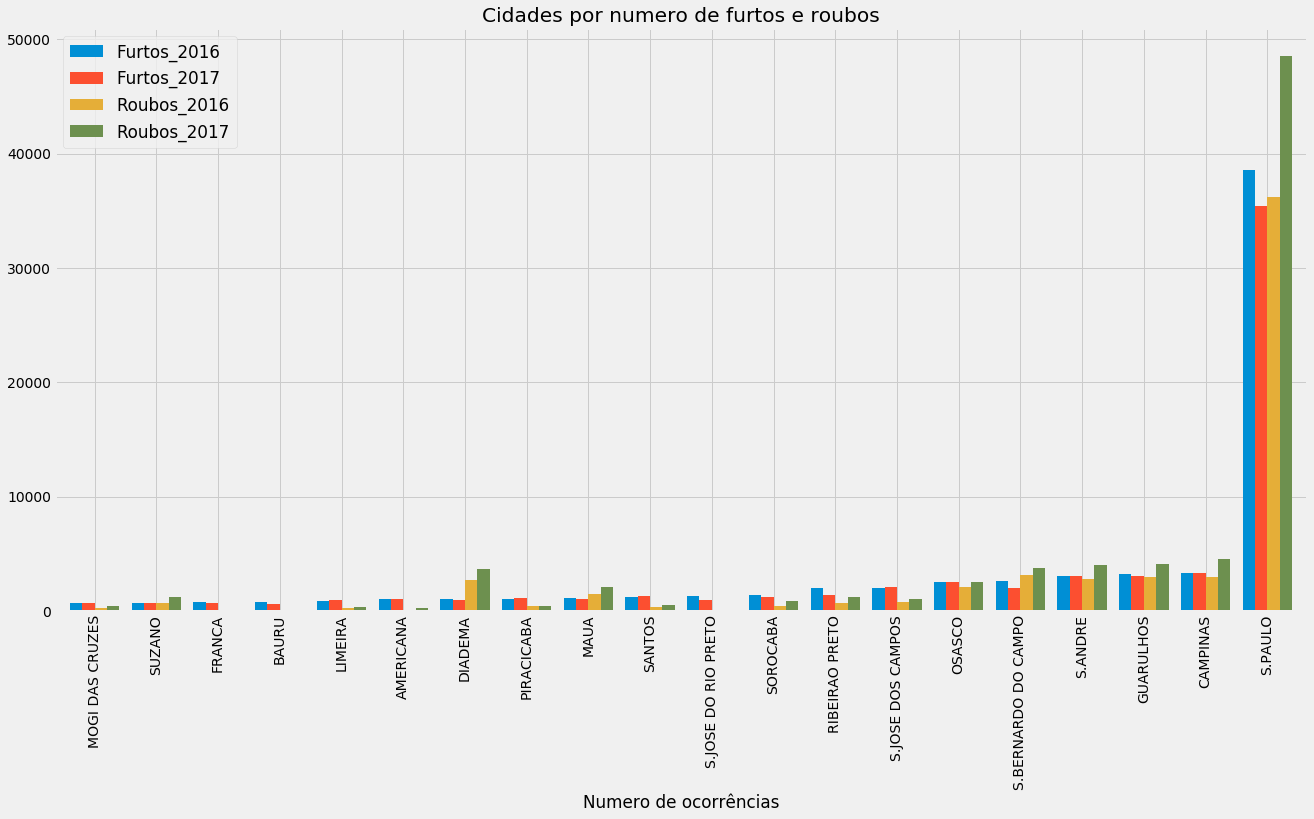

In [19]:
# Plotagem do gráfico 'top 20'

#====== Estilos da plotagem do gráfico, sinta-se a vontade para escolher ou adicionar o seu favorito!
#mtp.style.use('bmh')
mtp.style.use('fivethirtyeight')
#mtp.style.use('seaborn')
#mtp.style.use('ggplot')
#mtp.style.use('default')
#=======

# Pegando os valores da tabela e setando parâmetros para plotagem do gráfico
FxR.tail(20).plot(kind = 'bar', figsize = (20,10), width = 0.8, fontsize='medium')

plt.grid(True, which='major') # Grid de fundo
plt.title('Cidades por numero de furtos e roubos') # Título do gráfico
plt.xlabel('Numero de ocorrências') # Legenda eixo X
plt.legend(loc = 'upper left', fontsize = 'large') # Legenda de cores do gráfico e localização da mesma
plt.savefig('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\5 - Insights\Cidades_Furtos') # Salvando o gráfico em arquivo


##### OK São Paulo, sabemos que por ser a capital do estado vc é a estrela, agora pare de se achar...

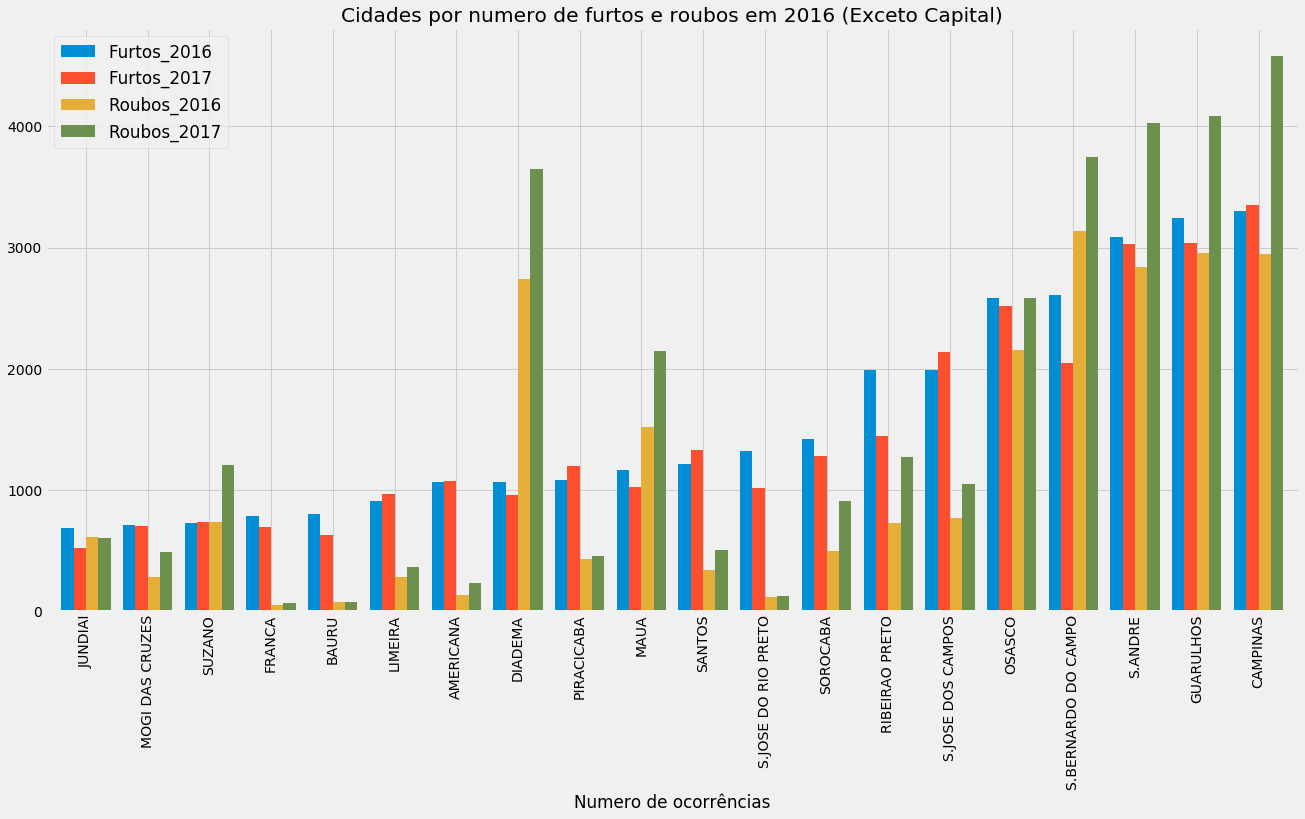

In [20]:
JooJ = FxR.drop('S.PAULO').tail(20) # Dropando o outlier São Paulo

# Plotando o gráfico sem o outlier
JooJ.plot(kind = 'bar', figsize = (20,10), width = 0.8, fontsize = 'medium')


plt.title('Cidades por numero de furtos e roubos em 2016 (Exceto Capital)') # Título
plt.xlabel('Numero de ocorrências') # Legenda eixo X
plt.legend(loc = 'upper left', fontsize = 'large') # Legenda de cores do gráfico
plt.savefig('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\5 - Insights\Cidades_Furtos_2') # Salvando gráfico em arquivo


#### Sem o outlier São Paulo, o gráfico fica muito mais legível e representa melhor as informações

## Top 20 Delegacias Regionais
    Depois de descobrir quais as cidades mais 'perigosas', me perguntei quais as delegacias com o maior número de ocorrências, então vamos a elas...

In [9]:
# Montagem da tabela com as 'top 20 delegacias'

top20 = furtos2016['DELEGACIA_CIRCUNSCRICAO'].value_counts(ascending = True).to_frame()
top20['Roubos 2016']= roubos2016['DELEGACIA_CIRCUNSCRICAO'].value_counts(ascending = True).to_frame()
top20.rename(inplace = True, columns={'DELEGACIA_CIRCUNSCRICAO':'Furtos 2016'})

top20['Furtos 2017'] = furtos2017['DELEGACIA_CIRCUNSCRICAO'].value_counts(ascending = True).to_frame()
top20['Roubos 2017'] = roubos2017['DELEGACIA_CIRCUNSCRICAO'].value_counts(ascending = True).to_frame()

top20.dropna(axis = 0, how = 'any', inplace = True) # Não queremos registros NaN


top20 = top20.astype({'Furtos 2016':int, 'Roubos 2016':int, 'Furtos 2017':int, 'Roubos 2017':int}) # Tipagem das colunas

# Consolidando por ano
top20['2016'] = top20['Furtos 2016'] + top20['Roubos 2016']
top20['2017'] = top20['Furtos 2017'] + top20['Roubos 2017']

delegacias = top20.sort_values(['2016','2017'], ascending = True)

In [10]:
# Dropando colunas utilizadas na montagem do DF e organizando os valores

delegacias.drop(['Furtos 2016','Roubos 2016','Furtos 2017','Roubos 2017'], axis = 1, inplace = True)
delegacias.sort_values(['2016','2017'], ascending = True) # Exibindo a listagem de delegacias

,2016,2017
DEL.POL.AGUAS DE S. PEDRO,2,2
DEL.POL.URANIA,2,5
DEL.POL.ITATINGA,2,6
DEL.POL.TERRA ROXA,2,12
DEL.POL.LINDOIA,2,16
07º D.P. SOROCABA,2,20
DEL.POL.SALTO GRANDE,3,3
DEL.POL.ITOBI,3,3
DEL.POL.ITABERÁ,3,3
DEL.POL.IPIGUA,3,4


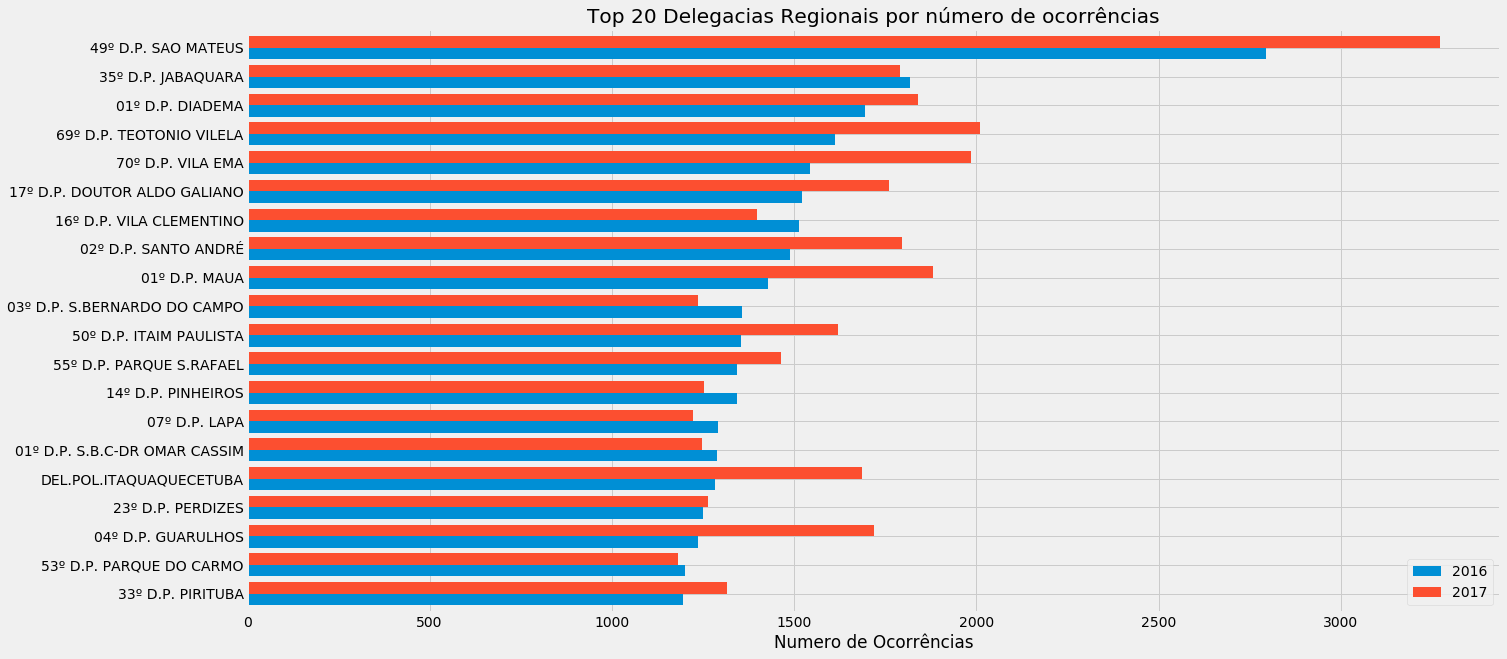

In [21]:
# Plotagem do gráfico 'top 20 delegacias'

# Pegando os ultimos 20 registros da tabela acima
delegacias.tail(20).plot(kind = 'barh', figsize = (20,10), width = 0.8, fontsize = 'medium')

plt.title('Top 20 Delegacias Regionais por número de ocorrências') # Título
plt.xlabel('Numero de Ocorrências') # Legenda eixo X
    
plt.savefig('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\5 - Insights\Top20 Delegacias') # Salvando em Arquivo

#### Se morar em São Matheus, é bom ter seguro no carro!

## Separando por tipo de veículo
    Os dataframes aqui utilizados, retratam os furtos e roubos de todos os tipos de veículos, desde bicicletas, até motorhomes (casas carro).
    Vamos analisar os casos de furtos e roubos entre 2016 e 2017

In [12]:
# Montagem do Dataframe tipo_veiculo

tipo_veiculo = furtos2016['DESCR_TIPO_VEICULO'].value_counts(ascending = True).to_frame()
tipo_veiculo['Roubos 2016'] = roubos2016['DESCR_TIPO_VEICULO'].value_counts(ascending = True).to_frame()
tipo_veiculo['Furtos 2017'] = furtos2017['DESCR_TIPO_VEICULO'].value_counts(ascending = True).to_frame()
tipo_veiculo['Roubos 2017'] = roubos2017['DESCR_TIPO_VEICULO'].value_counts(ascending = True).to_frame()

tipo_veiculo.rename_axis({'DESCR_TIPO_VEICULO':'Furtos 2016'}, axis = 'columns', inplace = True)
tipo_veiculo.fillna(value = 0, axis = 1, inplace = True) # Tratando os valores NaN, preenchendo com 0
tipo_veiculo

,Furtos 2016,Roubos 2016,Furtos 2017,Roubos 2017
TRICICLO,1,1.0,0.0,0.0
BICICLETA,1,0.0,0.0,0.0
MOTOR CASA,1,1.0,2.0,7.0
TRATOR MISTO,3,4.0,1.0,1.0
INEXIST.,5,0.0,7.0,0.0
TRATOR RODAS,18,27.0,19.0,45.0
CICLOMOTO,45,12.0,38.0,15.0
ONIBUS,52,48.0,37.0,145.0
MICRO-ONIBUS,151,242.0,159.0,272.0
REBOQUE,178,63.0,145.0,158.0


<i>Eu apenas acho que mais de uma bike foi furtada em 2016, mas tudo bem....</i>

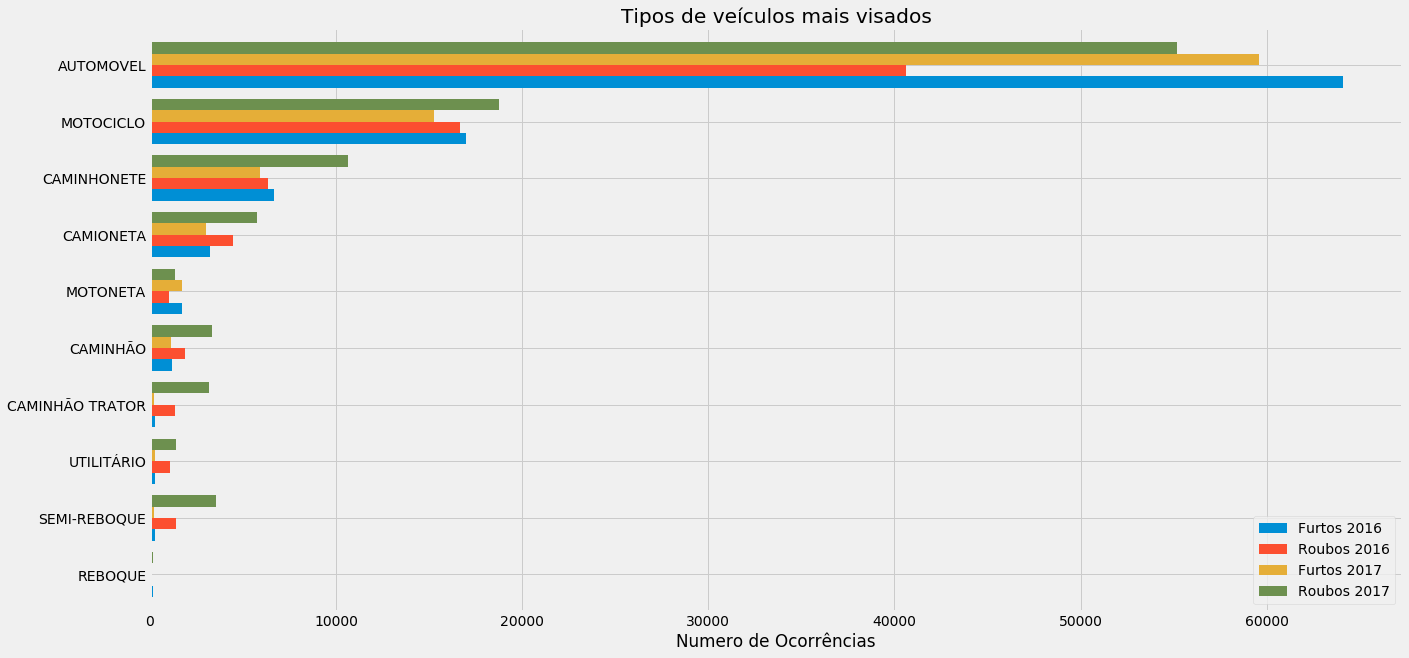

In [22]:
# Plotagem do gráfico de roubos por tipo de veículo

tipo_veiculo.tail(10).plot(kind = 'barh',  figsize = (20,10), width = 0.8, fontsize = 'medium')

plt.title('Tipos de veículos mais visados') # Título
plt.xlabel('Numero de Ocorrências') # Legenda eixo X
plt.legend(loc = 'lower right') # Localização da legenda de cores do gráfico
plt.savefig('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\5 - Insights\Tipos de veiculos mais visados') # Salvando em arquivo

## Montando o dataframe de marcas e modelos de veículos
    Hora de separar tudo por marca e modelo...

In [14]:
# Montagem do DF de roubos e furto de veículos

veiculos = furtos2016['DESCR_MARCA_VEICULO'].value_counts().to_frame()
veiculos['Furtos 2017'] = furtos2017['DESCR_MARCA_VEICULO'].value_counts().to_frame()
veiculos['Roubos 2016'] = roubos2016['DESCR_MARCA_VEICULO'].value_counts().to_frame()
veiculos['Roubos 2017'] = roubos2017['DESCR_MARCA_VEICULO'].value_counts().to_frame()
veiculos.rename_axis({'DESCR_MARCA_VEICULO':'Furtos 2016'}, axis='columns', inplace = True)

veiculos.head(20) 

,Furtos 2016,Furtos 2017,Roubos 2016,Roubos 2017
FIAT/UNO ELETRONIC,1505,1285.0,70.0,104.0
CHEVROLET/CELTA 1.0L LT,1454,961.0,286.0,297.0
FIAT/PALIO FIRE ECONOMY,1352,1005.0,330.0,358.0
HONDA/CG 125 FAN,1329,1025.0,498.0,448.0
VW/GOL 1.0,1329,1116.0,613.0,744.0
VW/GOL CL,1293,959.0,55.0,64.0
GM/CORSA WIND,1254,1270.0,293.0,345.0
HONDA/CBX 250 TWISTER,1069,926.0,707.0,689.0
HONDA/CG 150 TITAN KS,1001,837.0,908.0,893.0
HONDA/CG 125 TITAN KS,991,788.0,186.0,198.0


In [15]:
# Criando e populando colunas Marca e Modelo à partir do split do index (Fabricante/Modelo)

veiculos['Marca'] = veiculos.index.str.split('/').str[0] # Marca recebe a divisão da string index de veículos na posição 0 (MARCA/modelo)
veiculos['Modelo'] = veiculos.index.str.split('/').str[1] # Modelo recebe a divisão da string index de veiculos na posição 1 (marca/MODELO)
veiculos.head(20)

,Furtos 2016,Furtos 2017,Roubos 2016,Roubos 2017,Marca,Modelo
FIAT/UNO ELETRONIC,1505,1285.0,70.0,104.0,FIAT,UNO ELETRONIC
CHEVROLET/CELTA 1.0L LT,1454,961.0,286.0,297.0,CHEVROLET,CELTA 1.0L LT
FIAT/PALIO FIRE ECONOMY,1352,1005.0,330.0,358.0,FIAT,PALIO FIRE ECONOMY
HONDA/CG 125 FAN,1329,1025.0,498.0,448.0,HONDA,CG 125 FAN
VW/GOL 1.0,1329,1116.0,613.0,744.0,VW,GOL 1.0
VW/GOL CL,1293,959.0,55.0,64.0,VW,GOL CL
GM/CORSA WIND,1254,1270.0,293.0,345.0,GM,CORSA WIND
HONDA/CBX 250 TWISTER,1069,926.0,707.0,689.0,HONDA,CBX 250 TWISTER
HONDA/CG 150 TITAN KS,1001,837.0,908.0,893.0,HONDA,CG 150 TITAN KS
HONDA/CG 125 TITAN KS,991,788.0,186.0,198.0,HONDA,CG 125 TITAN KS


In [16]:
# Alguns veículos importados ficaram errados nas colunas durante o split...
veiculos[(veiculos['Marca'] == 'I')].head()

,Furtos 2016,Furtos 2017,Roubos 2016,Roubos 2017,Marca,Modelo
I/CHEVROLET AGILE LTZ,524,473.0,287.0,356.0,I,CHEVROLET AGILE LTZ
I/FIAT SIENA EL FLEX,487,525.0,79.0,110.0,I,FIAT SIENA EL FLEX
I/HYUNDAI I30 2.0,359,461.0,362.0,431.0,I,HYUNDAI I30 2.0
I/FIAT PALIO ATTRACT 1.0,221,255.0,115.0,170.0,I,FIAT PALIO ATTRACT 1.0
I/FIAT SIENA ELX FLEX,217,211.0,27.0,58.0,I,FIAT SIENA ELX FLEX


In [17]:
# Corrigindo a marca 'I' - Veículos importados
veiculos['Marca'] = veiculos.Marca.replace('I', veiculos['Modelo'].str.split().str[0])

# Corrigindo a marca 'IMP' - Veículos importados
veiculos['Marca'] = veiculos.Marca.replace('IMP', veiculos['Modelo'].str.split().str[0])

# Corrigindo a marca 'REB' e 'R' - Reboques
veiculos['Marca'] = veiculos.Marca.replace('REB', veiculos['Modelo'].str.split().str[0])
veiculos['Marca'] = veiculos.Marca.replace('R', veiculos['Modelo'].str.split().str[0])

# Corrigindo a marca 'MMC' - Mitsubishi
veiculos['Marca'] = veiculos.Marca.replace('MMC', 'MITSUBISHI')

# Corrigindo a marca 'SR' - Semi Reboque
veiculos['Marca'] = veiculos.Marca.replace('SR', veiculos['Modelo'].str.split().str[0])

# Corrigindo a marca 'H' - Honda
veiculos['Marca'] = veiculos.Marca.replace('H', veiculos['Modelo'].str.split().str[0])

# Juntando 'M.B' e 'M.BENZ'
veiculos['Marca'] = veiculos.Marca.replace('M.B.', 'M.BENZ')
veiculos['Marca'] = veiculos.Marca.replace('MBENZ','M.BENZ')

# Alterando LR para Land Rover
veiculos['Marca'] = veiculos.Marca.replace('LR', 'LAND ROVER')

# Juntando as variações de Chevrolet
veiculos['Marca'] = veiculos.Marca.replace('CHEVROLET', 'GM')
veiculos['Marca'] = veiculos.Marca.replace('CHEV', 'GM')

# Juntando as variações de Vw
veiculos['Marca'] = veiculos.Marca.replace('VOLKS', 'VW')
veiculos['Marca'] = veiculos.Marca.replace('VOLKSWAGEN', 'VW')
veiculos['Marca'] = veiculos.Marca.replace('VOLKSWAGEM', 'VW') # Sim, tem um registro escrito errado kkk

# Juntando variações de Harley Davidson
veiculos['Marca'] = veiculos.Marca.replace('H.DAVIDSON', 'HARLEY DAVIDSON')

In [27]:
veiculos.head()
#veiculos.head(40) # Observe que aparecem veículos importados no index, mas com o campo marca e modelo corretos

,Furtos 2016,Furtos 2017,Roubos 2016,Roubos 2017,Marca,Modelo
FIAT/UNO ELETRONIC,1505,1285.0,70.0,104.0,FIAT,UNO ELETRONIC
CHEVROLET/CELTA 1.0L LT,1454,961.0,286.0,297.0,GM,CELTA 1.0L LT
FIAT/PALIO FIRE ECONOMY,1352,1005.0,330.0,358.0,FIAT,PALIO FIRE ECONOMY
HONDA/CG 125 FAN,1329,1025.0,498.0,448.0,HONDA,CG 125 FAN
VW/GOL 1.0,1329,1116.0,613.0,744.0,VW,GOL 1.0


In [28]:
# Preenchendo NaN's com 0
veiculos.fillna(value = 0, axis = 0, inplace = True)

Text(0.5,0,'Ocorrências de Furtos e Roubos')

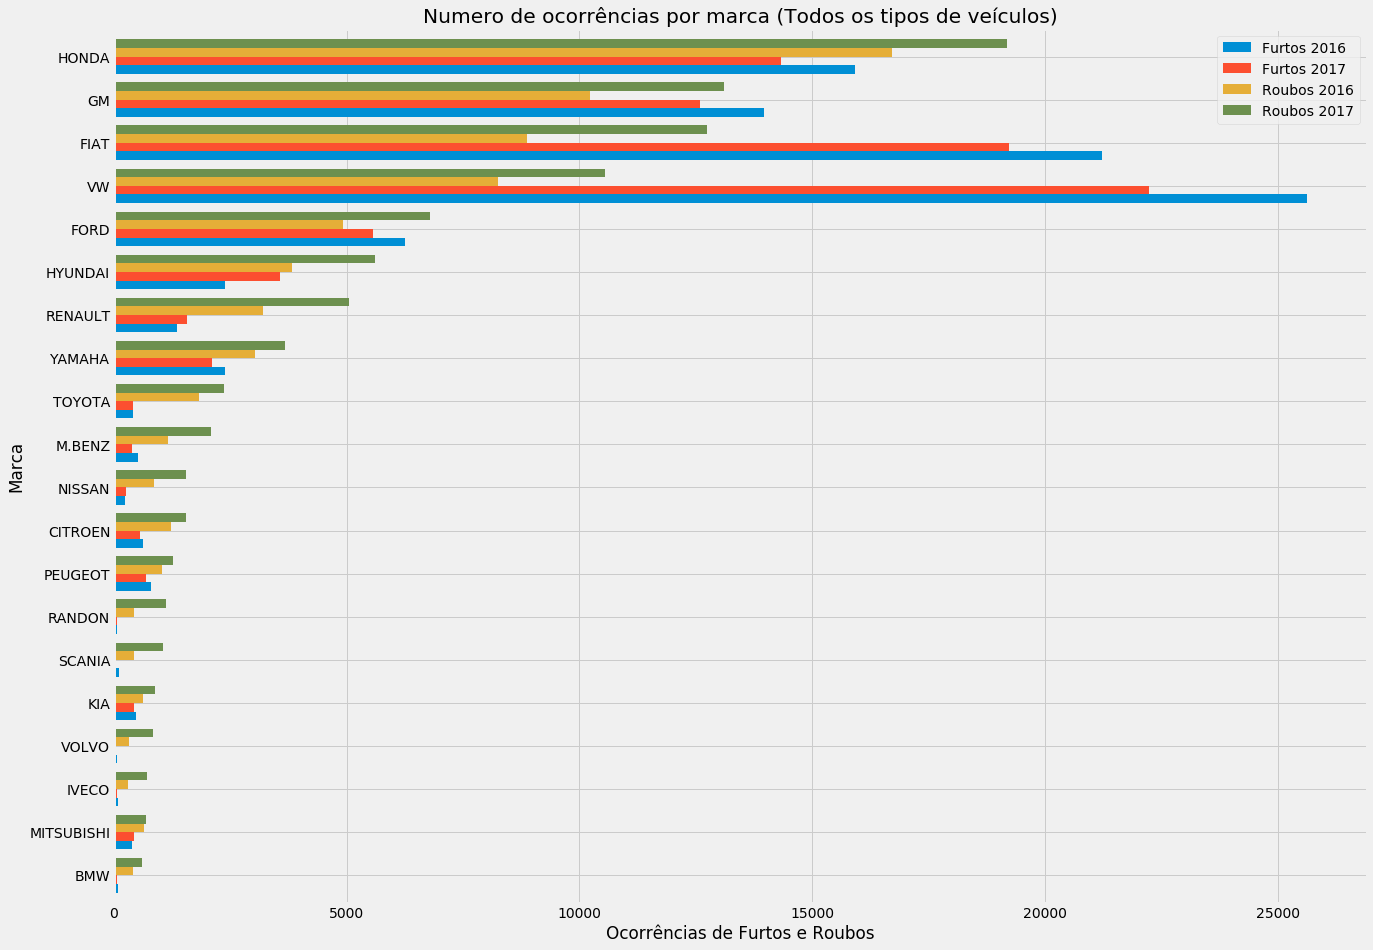

In [30]:
# Plotando o gráfico das marcas de veículos mais visados
veiculos.groupby('Marca').sum().sort_values('Roubos 2017').tail(20).plot(kind = 'barh', figsize = (20,15), width = 0.8)

plt.title('Numero de ocorrências por marca (Todos os tipos de veículos)') # Titulo
plt.xlabel('Ocorrências de Furtos e Roubos') # Legenda eixo X
plt.savefig('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\5 - Insights\Veiculos mais visados') # Salvando em arquivo

## Mas todos sabemos que a bandidagem prefere 'fazer os corre' a noite...
    Será que os dados nas tabelas confirmam esse senso comum??

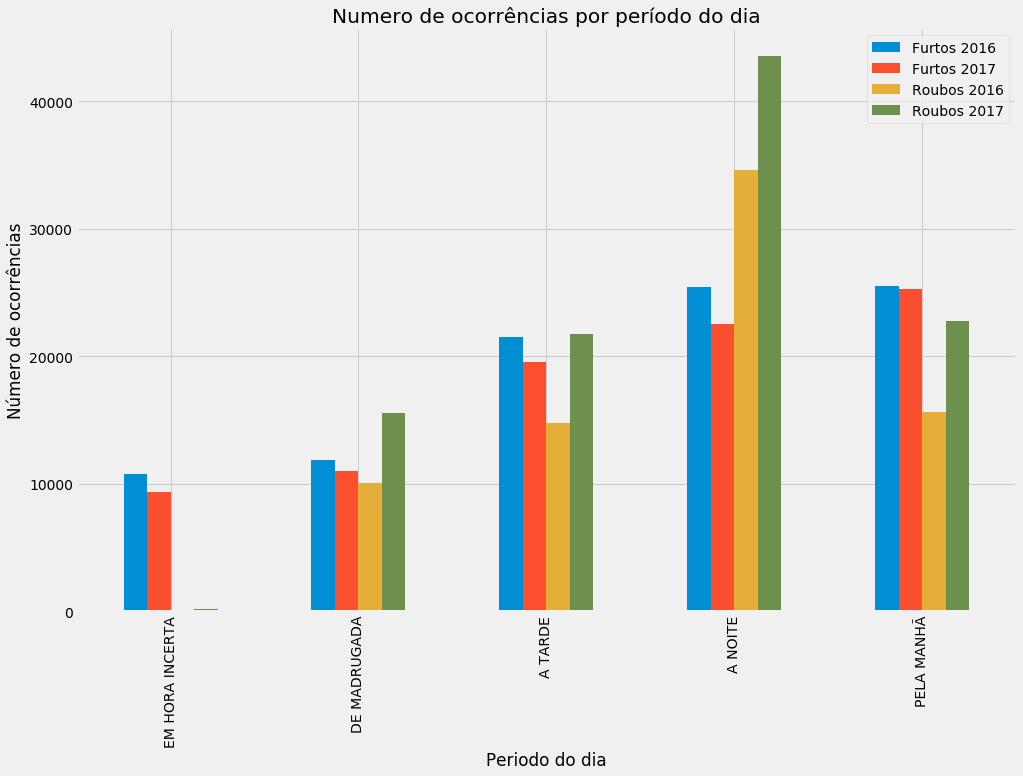

In [52]:
periodo = furtos2016['PERIDOOCORRENCIA'].value_counts().to_frame()
periodo['Furtos 2017'] = furtos2017['PERIDOOCORRENCIA'].value_counts().to_frame()
periodo['Roubos 2016'] = roubos2016['PERIDOOCORRENCIA'].value_counts().to_frame()
periodo['Roubos 2017'] = roubos2017['PERIDOOCORRENCIA'].value_counts().to_frame()

periodo.rename_axis({'PERIDOOCORRENCIA':'Furtos 2016'}, axis = 1, inplace = True)

periodo.sort_values('Furtos 2016').plot(kind = 'bar', figsize = (15, 10),fontsize = 'medium')

plt.title('Numero de ocorrências por período do dia') # Título
plt.xlabel('Periodo do dia') # Legenda eixo X
plt.ylabel('Número de ocorrências')
plt.savefig('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\5 - Insights\Periodo do dia') # Salvando em arquivo

##### É, agora é oficial, de noite é mais perigoso mesmo.